# Homework 2 (100 Points)

The goal of this homework is to get more practice with pandas and get practice with clustering on various datasets.


## Exercise 1 - (50 points)

This exercise will be using the [Airbnb dataset](http://insideairbnb.com/get-the-data.html) for NYC called `listings.csv`. You can download it directly [here](http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/visualisations/listings.csv)

a) Produce a Heatmap using the Folium package (you can install it using pip) of the mean listing price per location (lattitude and longitude) over the NYC map. (5 points)

Hints:
1. generate a base map of NYC to plot over: default_location=[40.693943, -73.985880] 
2. generate an HTML file named `index.html` - open it in your browser and you'll see the heatmap

In [1]:
# pip install Folium

In [3]:
import pandas as pd
import numpy as np
from folium import plugins, Map
from folium.plugins import HeatMap

df = pd.read_csv("listings.csv", low_memory=False)
# df.head()
base_map = Map(location=[40.693943, -73.985880])

df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
df['price'] = df['price'].astype(float)
mean = df.groupby(['latitude', 'longitude'], as_index=False)['price'].mean()
HeatMap(mean).add_to(base_map)
base_map.save("index.html")
df.head(20)
#see html file index.html
# base_map

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275.0,21,3,2022-08-10,0.03,1,267,1,NaN
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75.0,2,118,2017-07-21,0.73,1,0,0,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60.0,30,50,2019-12-02,0.30,2,322,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68.0,2,559,2022-11-20,3.38,1,79,50,NaN
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,175.0,30,49,2022-06-21,0.31,3,365,1,NaN
5,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.801070,-73.942550,Private room,65.0,30,1,2022-06-05,0.16,2,300,1,NaN
6,5803,"Lovely Room 1 in BEST AREA; Legal Rental, Spot...",9744,Laurie,Brooklyn,South Slope,40.668010,-73.987840,Private room,124.0,4,218,2022-10-10,1.31,3,163,14,NaN
7,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.709350,-73.953420,Entire home/apt,68.0,30,187,2022-11-02,1.13,1,151,5,NaN
8,7097,Perfect for Your Parents: Privacy + Garden,17571,Jane,Brooklyn,Fort Greene,40.691233,-73.972702,Entire home/apt,220.0,3,316,2022-10-29,2.01,2,38,36,NaN
9,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.787780,-73.947590,Private room,62.0,30,242,2022-10-21,1.52,1,308,8,NaN


b) Plot a bar chart of the average price per room type. Briefly comment on the relation between price and room type. - (2.5 pts)


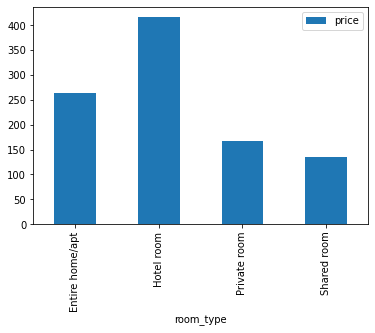

In [3]:
import matplotlib.pyplot as plt
df[["room_type", "price"]].groupby("room_type").mean().plot.bar()
plt.show()

-> your answer here
the average price for hotel room is much higher than the rest of the room types. Private room and shared room are the cheapest, which is reasonable for renting a place to stay on airbnb

c) Plot on the NYC map the top 10 most reviewed listings (Note: some could be in the same location) - (5 pts)


In [4]:
import folium
new_df = df[["latitude", "longitude", "number_of_reviews"]].sort_values("number_of_reviews", ascending=False).iloc[:10].reset_index(drop=True)
new_df.head(20)
base_map = Map([40.693943, -73.985880],zoom_start=12)
new_df.apply(lambda x: folium.Marker([x.latitude, x.longitude], popup=x.number_of_reviews).add_to(base_map), axis=1)
base_map.save("most_review.html")
#see html file most_review.html
# base_map

d) Using `longitude`, `latitude`, `price`, and `number_of_reviews`, use Kmeans to create 5 clusters. Plot the points on the NYC map in a color corresponding to their cluster. - (15 points)


In [5]:
from sklearn.cluster import KMeans

new_df = df[["longitude", "latitude", "price", "number_of_reviews"]]

marker_colors =[
    'lightgreen',
    'orange',
    'darkred',
    'darkblue',
    'darkgreen']

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(new_df)
# kmeans.labels_
new_df["kmeans"] = kmeans.labels_
# new_df.head(20)
base_map = Map(location=[40.693943, -73.985880],zoom_start=12)

new_df.apply(lambda x: folium.Circle(
        [x.latitude, x.longitude], 
        radius=1, 
        fill=True, 
        color=marker_colors[int(x.kmeans)],
        fill_color=marker_colors[int(x.kmeans)]).add_to(base_map), axis=1)
base_map.save("5_cluster.html")
#see html file 5_cluster.html
# base_map

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/yy/pdmswf251qs2tdymzfxsjbj40000gn/T/ipykernel_13201/274671679.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["kmeans"] = kmeans.labels_


e) You should see points in the same cluster all over the map (i.e. not really clustered together...) - briefly explain why that is. - (2.5 points)

-> your answer here I think the reason is that we force the number of clusters to be 5(too many culsters) based on three variables: price, location, number of reviews. The difference between points according to its three variables is much smaller than if we only consider two variable or even one, thus the cluster is smaller than expacted and all over the map.

f) How many clusters would you recommend using instead of 5? Display and interpret either the silhouette scores or the elbow method. - (5 points)

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


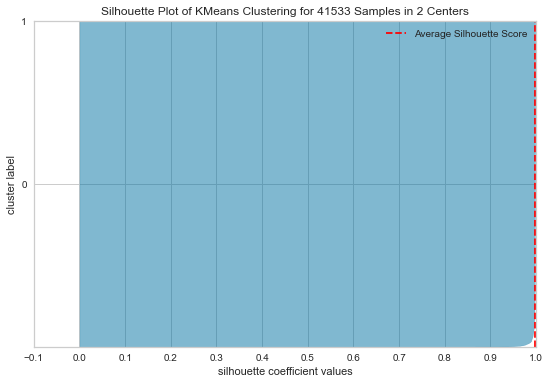

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


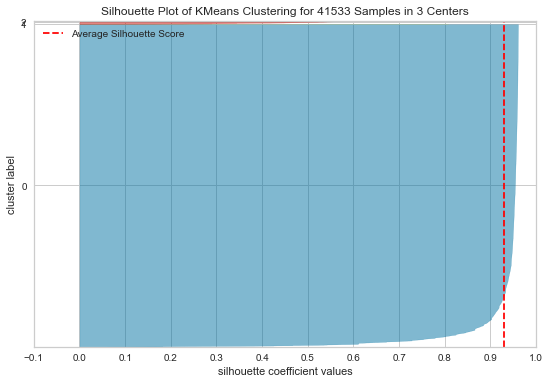

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


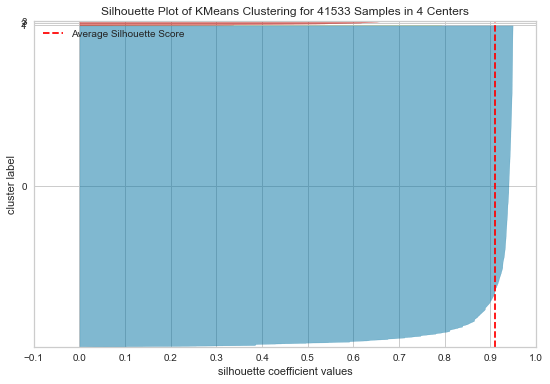

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


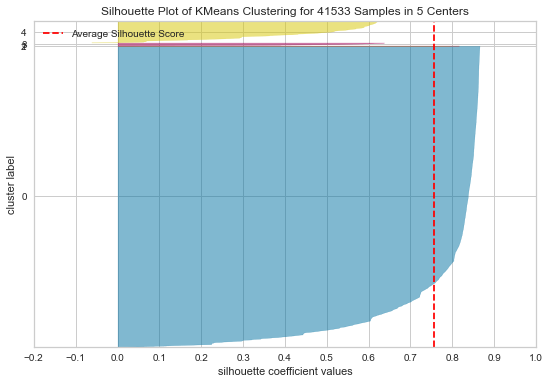

In [6]:
# from sklearn.metrics import silhouette_score

########WARNING! THIS CELL AND THE NEXT ONE WILL TAKE OVER 10MIN TO RETURN ALL GRAPHS.########
##########IF THE FOLLOWING TWO REALLY DO NOT RETURN AFTER LONG TIME, PLEASE REFER TO THE ELBOW GRAPH BELOW
##########HAVE TALKED WITH PROF, HE AGREED LEAVING THIS NOTE SINCE NOW IT IS RIGHT BEFORE THE DEADLINE AND 
#IT WILL TAKE A LONG TIME TO TAKE EACH SCREENSHOT AND MERGE IT INTO A PDF.

from yellowbrick.cluster import silhouette_visualizer

copy_df = df[["price", "number_of_reviews"]]
plt.rcParams["figure.figsize"] = (9,6)


for k in range(2, 6):
    silhouette_visualizer(KMeans(n_clusters=k, init='k-means++', random_state=0), X=copy_df,  colors='yellowbrick')


/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


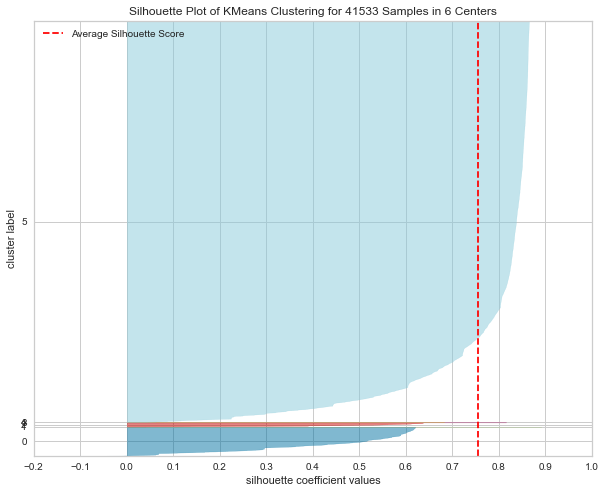

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


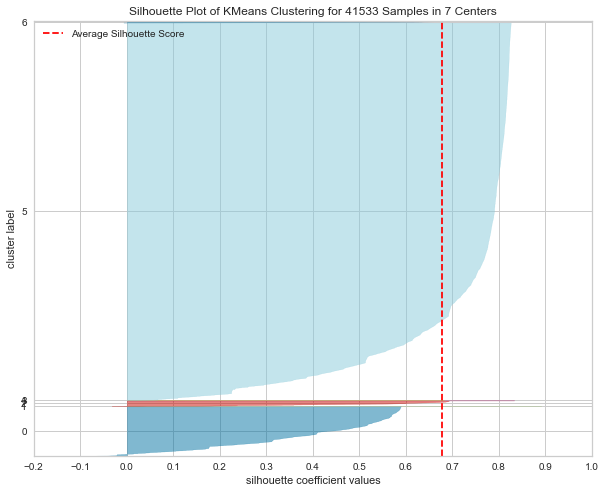

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


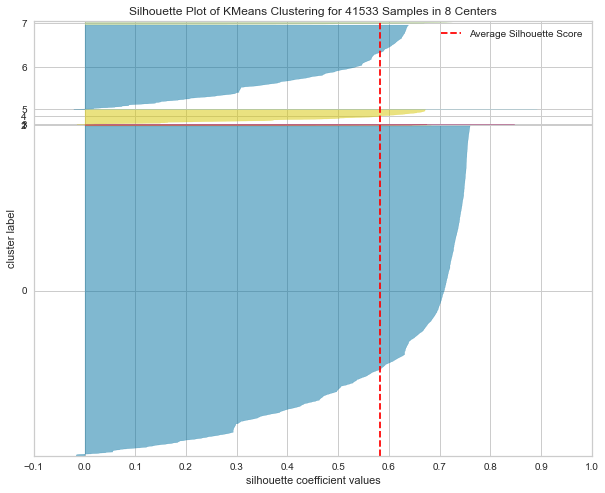

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


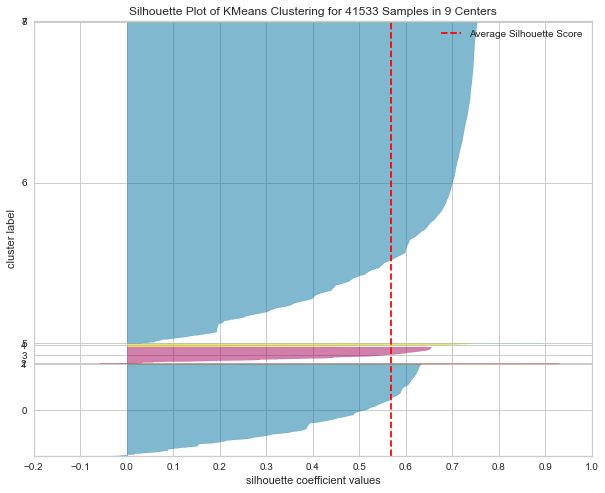

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


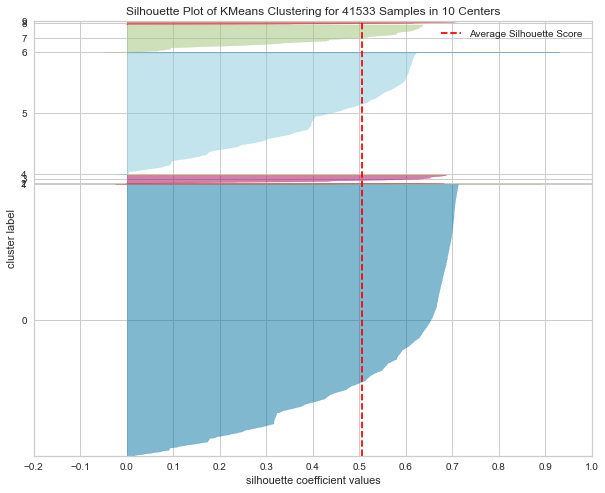

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


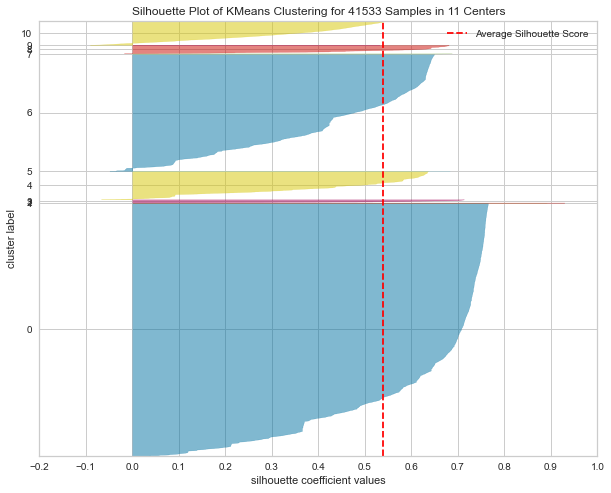

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


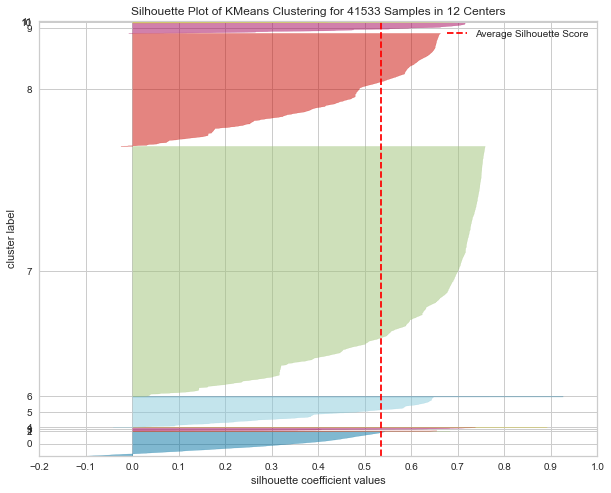

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


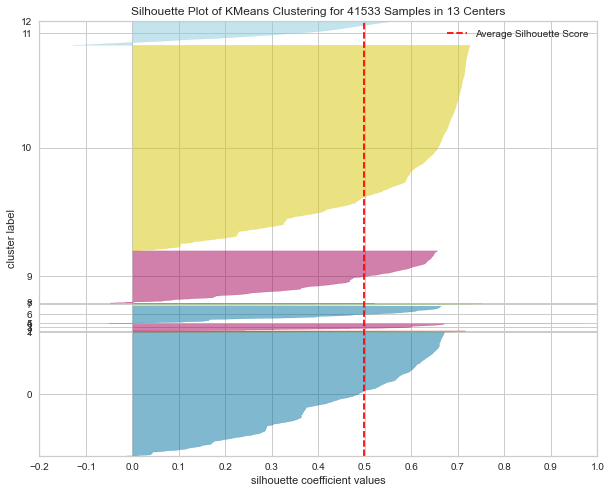

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


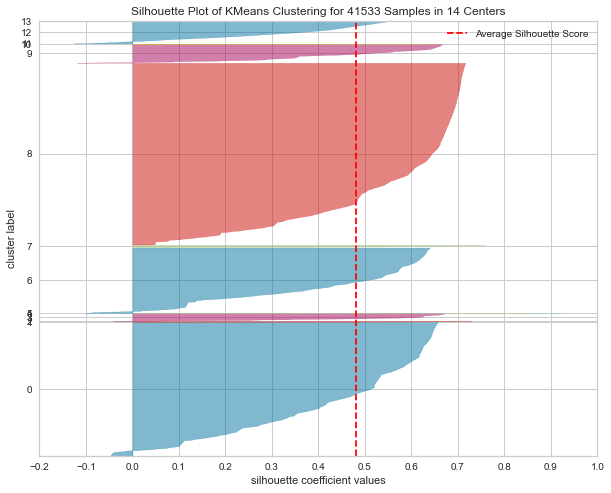

In [7]:
########WARNING! THIS CELL WILL TAKE OVER 10MIN TO RETURN ALL GRAPHS.########
#CHECK THE NOTE IN THE ABOVE CELL

plt.rcParams["figure.figsize"] = (10,8)

for i in range(6, 15):
    silhouette_visualizer(KMeans(n_clusters=i, init='k-means++', random_state=0), X=copy_df,  colors='yellowbrick')

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_k

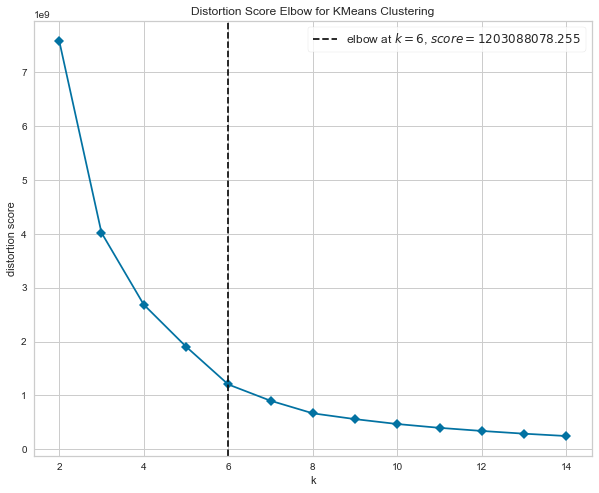

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
#elbow graph
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer



visualizer = KElbowVisualizer(KMeans(n_clusters=k, init='k-means++', random_state=0), k=(2,15),timings=False)

visualizer.fit(copy_df)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

-> your answer here from the elbow graph, we can see the elbow is at 6. When cluster number =6, the clustering has the best performence. However, for the silhouette scores visualizations, it shows possibily k=8 is a better option where all the clusters exceeds the average score. However, the average score is a bit way too big. Thus, the cluster number =6 would be a better option.

g) For all listings of type `Shared room`, plot the dendrogram of the hierarchical clustering generated from `longitude`, `latitude`, and `price`. You can use any distance function. - (10 points)

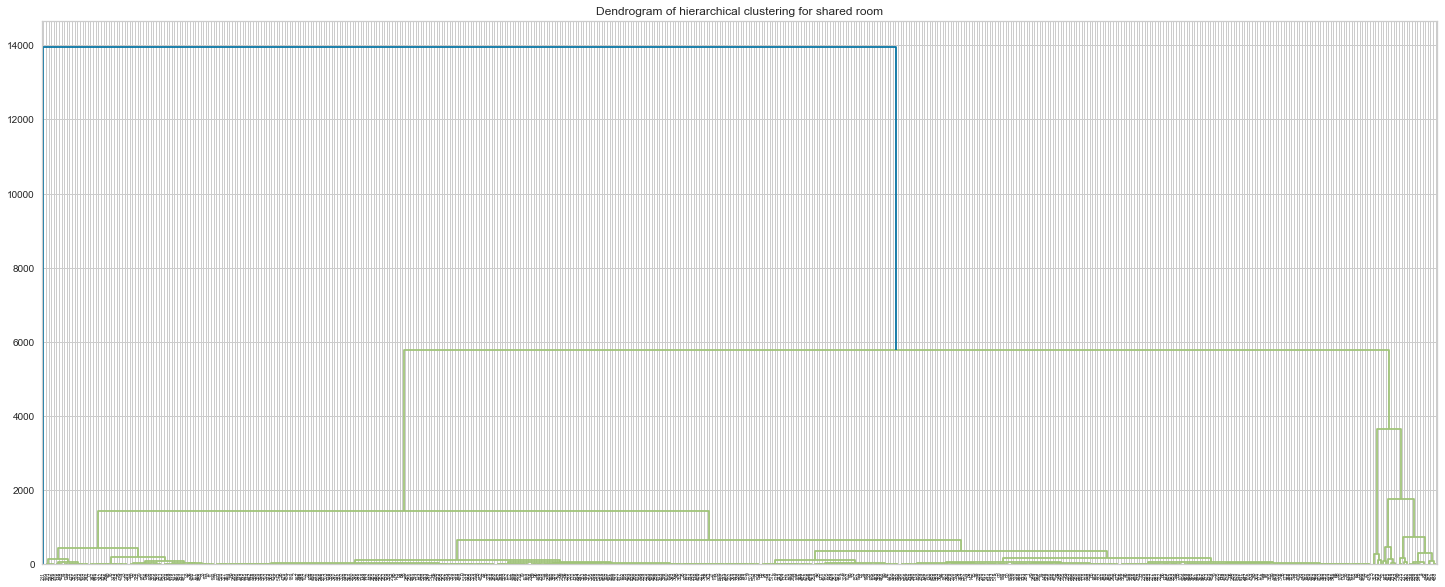

In [9]:
from scipy.cluster import hierarchy
plt.figure(figsize=(25, 10))

new_df = df[['latitude', 'longitude', 'price', 'room_type']]
new_df = new_df[new_df['room_type']== 'Shared room'].drop(columns=['room_type'])

hier_clusters = hierarchy.linkage(new_df, method="ward", metric="euclidean")
hierarchy.dendrogram(hier_clusters)

plt.title("Dendrogram of hierarchical clustering for shared room")
plt.show()

h) Normalize `longitude`, `latitude`, and `price` by subtracting by the mean (of the column) and dividing by the standard deviation (of the column). Repeat g) using the normalized data. Comment on what you observe. - (5 points)

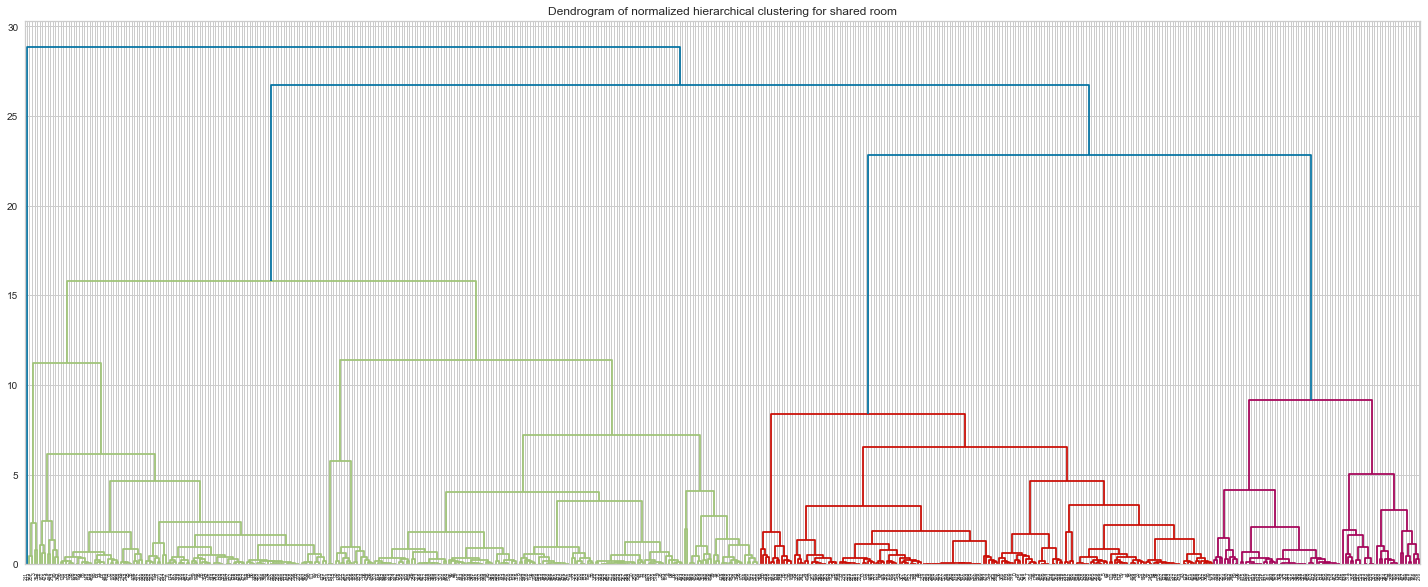

In [10]:

plt.figure(figsize=(25, 10))

new_df.price =(new_df.price -new_df.price.mean())/ new_df.price.std()
new_df.longitude =(new_df.longitude -new_df.longitude.mean())/ new_df.longitude.std()
new_df.latitude =(new_df.latitude -new_df.latitude.mean())/ new_df.latitude.std()


hier_clusters = hierarchy.linkage(new_df, method="ward", metric="euclidean")
hierarchy.dendrogram(hier_clusters)

plt.title("Dendrogram of normalized hierarchical clustering for shared room")
plt.show()



-> your answer here
by comparing the two graphs, we can tell the normalized dataset is more suitable for visualizing the clustering. For the x-axis and y-axis that are extremely big in the first dendrogram, the second dendrogram normalized the inputs and we can actually "zoom in" on the dataset to get a closer look. The first dendrogram shows the clusters clustering in same place and the second one shows the clusters more evenly distributted on the graph, for better obeservation. 

## Exercise 2 (50pts)

Re-using the dbscan code written in class, reproduce the following animation of the dbscan algorithm

In [11]:
# from IPython.display import Image
# Image(filename="dbscan.gif", width=500, height=500)

Hints:

- First animate the dbscan algorithm for the dataset used in class (before trying to create the above dataset)
- Take a snapshot of the assignments when the point gets assigned to a cluster
- Confirm that the snapshot works by saving it to a file
- Don't forget to close the matplotlib plot after saving the figure
- Gather the snapshots in a list of images that you can then save as a gif using the code below
- Use `ax.set_aspect('equal')` so that the circles don't appear to be oval shaped
- To create the above dataset you need two blobs for the eyes. For the mouth you can use the following process to generate (x, y) pairs:
  - Pick an x at random in an interval that makes sense given where the eyes are positioned
  - For that x generate y that is 0.2 * x^2 plus a small amount of randomness
  - `zip` the x's and y's together and append them to the dataset containing the blobs



In [12]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import math

# centers = [[1, 1], [-1, -1], [1, -1]]
# X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                             random_state=0)
# plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
# plt.show()

TEMPFILE = 'temp.png'


class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts 
        self.epsilon = epsilon
        self.snaps = []
        self.assignments = [0 for _ in range(len(self.dataset))]
    
    #additional helper function to see if the points fall inside of the epsilon radius
    def in_radius(self, i,x):
        return np.linalg.norm(self.dataset[i]-self.dataset[x])<= self.epsilon


    def is_core(self,i):
        neighbors =[]
        for x in range(len(self.dataset)):
            if i !=x and self.in_radius(i,x):
                neighbors.append(x)

        return len(neighbors)>= self.min_pts
    
    def get_unlabeled_neighbors(self,i):
        neighbors =[]
        num = 0
        for x in range(len(self.dataset)):
            if i !=x and self.in_radius(i,x):
                num +=1
                if self.assignments[x] ==0:
                    neighbors.append(x)
        if num < self.min_pts:
              neighbors =[]
        return neighbors
    
    def do_assign(self,i, cluster_num):
     
        self.assignments[i] = cluster_num
        neighbors =self.get_unlabeled_neighbors(i)
        while neighbors:
            next_candid = neighbors.pop()
            if self.assignments[next_candid] !=0:
                # print("wrong")
                continue
            self.assignments[next_candid] = cluster_num
            self.snapshot(next_candid)


            if self.is_core(next_candid):
                neighbors += self.get_unlabeled_neighbors(next_candid)
        return 
  


    def snapshot(self,assigned):
        fig, ax = plt.subplots()
        colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
        colors = np.hstack([colors] * 20)

        ax.scatter(self.dataset[:, 0], self.dataset[:, 1], color=colors[self.assignments].tolist(), s=10, alpha=0.8)
        cir = plt.Circle(self.dataset[assigned],radius =0.3, fill= False, edgecolor = colors[self.assignments[assigned]]) # create circle around the point assigned
        ax.add_patch(cir)
        ax.set_xlim(left =math.floor(min(self.dataset[:,0])-0.4),right =math.ceil(max(self.dataset[:,0]))+0.4)
        ax.set_ylim(bottom =math.floor(min(self.dataset[:,1])-0.4),top =math.ceil(max(self.dataset[:,1]))+0.4)
        ax.set_aspect('equal') # necessary or else the circles appear to be oval shaped

        fig.savefig(TEMPFILE)
        plt.close()

        return self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))


    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        #every point should be in cluster point 0
        cluster_num=1
        #let index part of assignment correspond to index point of the dataset 
        for pt in range(len(self.dataset)):
            if self.assignments[pt] != 0:#already assigned to a cluster
                continue
            if self.is_core(pt):
                self.do_assign(pt,cluster_num)
                
            cluster_num+=1
        return self.assignments


centers = [[-1,2],[1,2]]
eyes, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.2,
                            random_state=0)

mouth_x = 4 * np.random.random(350)-2
mouth_y = 0.2*mouth_x **2 + 0.1 * np.random.randn(350)
mouth = list(zip(mouth_x,mouth_y))
face = np.append(eyes, mouth, axis=0)

dbc = DBC(face,3, 0.2)
clustering = dbc.dbscan()
#testing

##############
dbc.snaps[0].save(
    'my_dbscan.gif',
    optimize=False,
    save_all=True,
    append_images=dbc.snaps[1:],
    loop=0,
    duration=25
)

In [13]:
#check html my_dbscan.gif


# from IPython.display import Image
# Image(filename="my_dbscan.gif", width=500, height=500)